In [2]:
#multiclass situation with mutually exclusive classes --> Softmax Function
#1 Output note per class (dummy variables)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import cleaned data set
df = pd.read_csv('cleaned_data/Cleaned Data.csv', index_col=[0])

In [5]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Signal
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0,1,0,0,0,0,0,0,0,Sell
2,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0,1,0,0,0,0,0,0,0,Buy
3,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0,1,0,0,0,0,0,0,0,Buy
4,1.972400e+10,0.0083,1.304100e+10,6.683000e+09,0.000000e+00,3.709000e+09,4.162000e+09,2.521000e+09,2.840000e+08,2.382000e+09,...,0,1,0,0,0,0,0,0,0,Buy
5,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0,1,0,0,0,0,0,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0,0,0,0,1,0,0,0,0,Buy
11576,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,1,0,0,Sell
11577,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,Sell
11578,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,1,0,0,0,Sell


In [6]:
#Arrange response variable with dummy variable
X = df.drop('Signal', axis=1)
y = pd.get_dummies(df['Signal'])

In [7]:
#inspecting if transition worked for response variable
y.head(3)

,Buy,Hold,Sell
1,0,0,1
2,1,0,0
3,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [10]:
#scale our data to avoid issues (X_scaled = X_std * (max - min) + min)
from sklearn.preprocessing import MinMaxScaler

In [11]:
#creating an instance
scaler = MinMaxScaler()

#adjusting scaler only based on the training set (without test values to prevent data leakage)
scaler.fit(X_train)

MinMaxScaler()

In [12]:
#perform the transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape

(8105, 230)

In [44]:
#import functions to create a neural network model based on keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [70]:
#set up a empty sequential model
model = Sequential()

#adding dense layers (=regular densely-connected NN layer)
#rule of thumb: Create as many NN as features for first layer
model.add(Dense(230, activation='relu'))

#dropout layer to prevent overfitting
model.add(Dropout(0.2))

#repeat process, but reduce amount of neurons for each step by half
model.add(Dense(115, activation='relu'))
model.add(Dropout(0.2))        
          
model.add(Dense(57, activation='relu'))
model.add(Dropout(0.2))           
  
#1 Output neuron per class
model.add(Dense(3, activation='softmax'))

#optimize a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
#fit the model to our training date, 
#Our model will go trough the training data 300 times
model.fit(x=X_train, y=y_train, epochs=300, batch_size=256)

Epoch 1/300
32/32 [==============================] - 3s 13ms/step - loss: 0.9327 - accuracy: 0.4893
Epoch 2/300
32/32 [==============================] - 0s 13ms/step - loss: 0.8949 - accuracy: 0.5243
Epoch 3/300
32/32 [==============================] - 0s 13ms/step - loss: 0.8799 - accuracy: 0.5162
Epoch 4/300
32/32 [==============================] - 0s 13ms/step - loss: 0.8850 - accuracy: 0.5199
Epoch 5/300
32/32 [==============================] - 0s 13ms/step - loss: 0.8888 - accuracy: 0.5176
Epoch 6/300
32/32 [==============================] - 0s 13ms/step - loss: 0.8842 - accuracy: 0.5352
Epoch 7/300
32/32 [==============================] - 1s 17ms/step - loss: 0.8839 - accuracy: 0.5277
Epoch 8/300
32/32 [==============================] - 1s 17ms/step - loss: 0.8792 - accuracy: 0.5259
Epoch 9/300
32/32 [==============================] - 1s 17ms/step - loss: 0.8768 - accuracy: 0.5316
Epoch 10/300
32/32 [==============================] - 1s 17ms/step - loss: 0.8777 - accuracy: 0.5287

32/32 [==============================] - 0s 11ms/step - loss: 0.8433 - accuracy: 0.5733
Epoch 82/300
32/32 [==============================] - 0s 11ms/step - loss: 0.8465 - accuracy: 0.5658
Epoch 83/300
32/32 [==============================] - 0s 11ms/step - loss: 0.8493 - accuracy: 0.5586
Epoch 84/300
32/32 [==============================] - 0s 12ms/step - loss: 0.8461 - accuracy: 0.5664
Epoch 85/300
32/32 [==============================] - 0s 11ms/step - loss: 0.8521 - accuracy: 0.5680
Epoch 86/300
32/32 [==============================] - 0s 15ms/step - loss: 0.8425 - accuracy: 0.5707 0s - loss: 0.8476 - accu
Epoch 87/300
32/32 [==============================] - 1s 16ms/step - loss: 0.8535 - accuracy: 0.5649
Epoch 88/300
32/32 [==============================] - 1s 16ms/step - loss: 0.8434 - accuracy: 0.5713
Epoch 89/300
32/32 [==============================] - 1s 17ms/step - loss: 0.8411 - accuracy: 0.5700 0s - loss: 0.8354 - accura - ETA: 0s - loss: 0.8398 - accuracy: 
Epoch 90/300
3

32/32 [==============================] - 0s 14ms/step - loss: 0.8195 - accuracy: 0.5844
Epoch 161/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8221 - accuracy: 0.5796
Epoch 162/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8151 - accuracy: 0.5866
Epoch 163/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8114 - accuracy: 0.5874
Epoch 164/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8009 - accuracy: 0.5993
Epoch 165/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8279 - accuracy: 0.5745
Epoch 166/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8101 - accuracy: 0.5932
Epoch 167/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8156 - accuracy: 0.5949
Epoch 168/300
32/32 [==============================] - 0s 15ms/step - loss: 0.8065 - accuracy: 0.5919
Epoch 169/300
32/32 [==============================] - 0s 15ms/step - loss: 0.8069 - accuracy: 0

32/32 [==============================] - 0s 8ms/step - loss: 0.7812 - accuracy: 0.5989
Epoch 240/300
32/32 [==============================] - 0s 9ms/step - loss: 0.7939 - accuracy: 0.5958
Epoch 241/300
32/32 [==============================] - 0s 10ms/step - loss: 0.7899 - accuracy: 0.6058
Epoch 242/300
32/32 [==============================] - 0s 15ms/step - loss: 0.7964 - accuracy: 0.5997
Epoch 243/300
32/32 [==============================] - 0s 15ms/step - loss: 0.7941 - accuracy: 0.5974
Epoch 244/300
32/32 [==============================] - 0s 14ms/step - loss: 0.7950 - accuracy: 0.6056
Epoch 245/300
32/32 [==============================] - 0s 14ms/step - loss: 0.7799 - accuracy: 0.6179
Epoch 246/300
32/32 [==============================] - 0s 14ms/step - loss: 0.7834 - accuracy: 0.6106
Epoch 247/300
32/32 [==============================] - 0s 14ms/step - loss: 0.8017 - accuracy: 0.5996 0s - loss: 0.8070 - accuracy
Epoch 248/300
32/32 [==============================] - 1s 17ms/step -

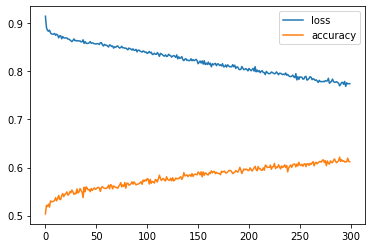

In [72]:
#plotting training history of our algorithm
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
#analysing performance on training data
model.evaluate(X_train,y_train,verbose=0)

[0.7477112412452698, 0.6261566877365112]

In [74]:
#analysing performance on test data
model.evaluate(X_test,y_test,verbose=0)

[1.063571572303772, 0.5616004467010498]

In [75]:
#saving model
from tensorflow.keras.models import load_model

model.save('model.h5')

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
predictions = model.predict_classes(X_test)

In [80]:
#reverse dummy variables (https://stackoverflow.com/questions/50607740/reverse-a-get-dummies-encoding-in-pandas)
y_true = y_test.idxmax(axis=1)
y_true

6158     Sell
5623     Sell
3789      Buy
457      Sell
161      Sell
         ... 
148      Sell
11277     Buy
9952      Buy
6840      Buy
8468     Sell
Length: 3474, dtype: object

In [81]:
# code to numbers for y_true
SignalFac = []

for string in y_true:
    if string == 'Sell':
        SignalFac.append(2)
    elif string == 'Hold':
        SignalFac.append(1)    
    else:
        SignalFac.append(0)

In [82]:
print(classification_report(SignalFac,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1404
           1       0.09      0.01      0.02       224
           2       0.61      0.68      0.64      1846

    accuracy                           0.56      3474
   macro avg       0.40      0.39      0.39      3474
weighted avg       0.53      0.56      0.54      3474



In [83]:
#We see F1 Score for predicting a Sell is the highest followed by the buy prediction
#However, our model has some trouble to predict the hold signal

In [84]:
df['Signal'].value_counts()

Sell    6153
Buy     4681
Hold     745
Name: Signal, dtype: int64

In [85]:
#checking if our model learned something
6153/len(df)

0.5313930391225494

In [86]:
#We see the accuracy of our model is better than the default guess on sell

In [87]:
print(confusion_matrix(SignalFac,predictions))

[[ 698   10  696]
 [ 110    2  112]
 [ 584   11 1251]]
